In [17]:
import yaml
import numpy as np


import luxeics
# import matplotlib.pyplot as plt


input_filename = 'New.yml'

with open( input_filename, 'r' ) as stream:
    input_dict = yaml.load(stream, Loader=yaml.SafeLoader)

print (input_dict)



luxeics.main_program( input_filename )



{'beam': {'beam_charge': '100e-12', 'emittance': 1.5, 'energyspread': '1e-3', 'gamma': 32289.62818003914, 'sigmaL': 20.0, 'sigmaT': 10.0, 'theta': 0.0}, 'control': {'beam': {'Nemit': 30, 'Nenergy': 7}, 'energyaverage': False, 'laser': {'sigma_crit': 500.0, 'sigma_rescale': False}, 'mode': 'full', 'name': 'New', 'radiation': 'KN', 'sample_electrons': '1e8', 'sampling': 'rejection'}, 'detector': {'omega': ['5.0e9', '9.2e9', 300], 'pdim': 2, 'phi': 0.0, 'theta': [0, '15e-6', 110]}, 'laser': {'Tpulse': 100.0, 'a0': 0.1, 'omega0': 4.1, 'pol': 0.7853981633974483, 'pulse': 'cos2', 'w0': 25.0}}
>>> mode == full
[10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000] 100000000 100000000
 >> number_electrons   = 624150947
 >> sample_electrons   = 100000000
 >> electron weight    = 6.242
 >> MC sampling
  > batch 0 : 10000000 macroelectrons
   base photon weight : 6.987178588540231
   number photons     : 13196
   total photon number: 13196
  > batch 1

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import h5py
import yaml
from scipy.interpolate import interp2d,RectBivariateSpline
import numpy as np

In [4]:
input_filename = 'New'

with h5py.File(input_filename + '.h5' ,'r') as ff:
#     omega      = ff['final-state/spectrum/omega'][:]/1e9
#     theta      = ff['final-state/spectrum/theta'][:]*1e6
#     spectrum   = ff['final-state/spectrum/spectrum'][:]
    
    K0,K1,K2,K3  = ff['final-state/photon/momentum'][:].T
    X0,X1,X2,X3  = ff['final-state/photon/position'][:].T
    W            = ff['final-state/photon/weight'  ][:]

    P0,P1,P2,P3  = ff['final-state/electron/momentum'][:].T
#     X0,X1,X2,X3  = ff['final-state/photon/position'][:].T
#     We            = ff['final-state/photon/weight'  ][:]


In [5]:
with open( input_filename + '.yml', 'r' ) as stream:
    input_dict = yaml.load(stream, Loader=yaml.SafeLoader)
    
    mode             = input_dict['control']['mode']
    
    
    beam_charge      = float( input_dict['beam']['beam_charge'])
    number_electrons = int( beam_charge / 1.60217653e-19)

#     sampling         = input_dict['control']['sampling']
    sampling = mode
    
    w0               = float(input_dict['laser']['w0'])
    omega0           = float(input_dict['laser']['omega0'])
    gamma            = float(input_dict['beam']['gamma'])
    Xr               = 4*gamma*omega0/511*10**(-3)
    energyspread     = float(input_dict['beam']['energyspread'])


In [6]:
print (f'beam charge                              : {beam_charge*1e12:.24} pC')
print (f'number of beam electrons                 : {number_electrons:.3e}')
print ('-'*42)
print (f'{sampling} sampling:')
print (f'max  single photon weight                : {amax(W):.4g}')
print (f'mean single photon weight                : {mean(W):.4g}')
print (f'total photon weight                      : {sum(W):.4g}')
print (f'total photon weight per incident electron: {sum(W)/number_electrons:.4g}')
print (f'total macro photon number                : {len(W)}')
print ('-'*42)
print(f' Frequency (Laser) :  {omega0}'  )
print(f'Recoil Factor:{Xr}')


beam charge                              : 100.0 pC
number of beam electrons                 : 6.242e+08
------------------------------------------
full sampling:
max  single photon weight                : 7.244
mean single photon weight                : 6.753
total photon weight                      : 8.955e+05
total photon weight per incident electron: 0.001435
total macro photon number                : 132606
------------------------------------------
 Frequency (Laser) :  4.1
Recoil Factor:1.0363011783809037


In [8]:
# figure(figsize=(10,6))
# pcolormesh(omega.ravel(),theta.ravel(),spectrum.T,rasterized=True,cmap=cm.magma)
# xlim(6,9)
# ylim(0,15)
# colorbar(label='spectrum')

# xlabel(r'$\omega$ (GeV)')
# ylabel(r'$\theta$ ($\mu$rad)')

# savefig('spectrum.pdf')

130844


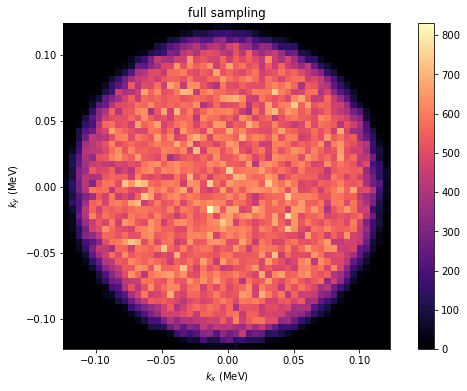

In [22]:
figure(figsize=(10,6))

subplot(111,aspect=1)
hist2d(K1/1e6,K2/1e6,bins=(50,50),weights=W,rasterized=True,cmap=cm.magma);
colorbar()
title(f'{sampling} sampling')
print(len(X2))
xlabel(r'$k_x$ (MeV)')
ylabel(r'$k_y$ (MeV)')


savefig(f'photon_transverse_momentum_{input_filename}_{mode}.pdf')

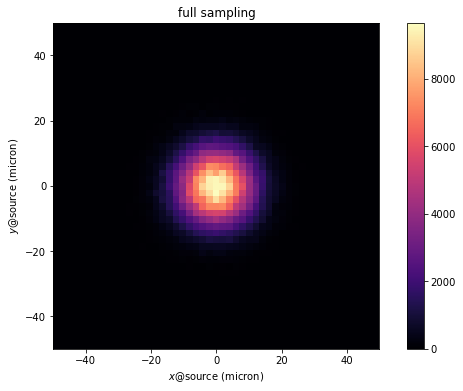

In [23]:
figure(figsize=(10,6))

bbins=(linspace(-2*w0,2*w0,50),linspace(-2*w0,2*w0,50))

subplot(111,aspect=1)
hist2d(X1,X2,bins=bbins,weights=W,rasterized=True,cmap=cm.magma);
colorbar()

xlabel(r'$x@$source (micron)')
ylabel(r'$y@$source (micron)')
title(f'{sampling} sampling')

xlim(-2*w0,2*w0)
ylim(-2*w0,2*w0)


savefig(f'photon_source_size_{input_filename}_{mode}.pdf')


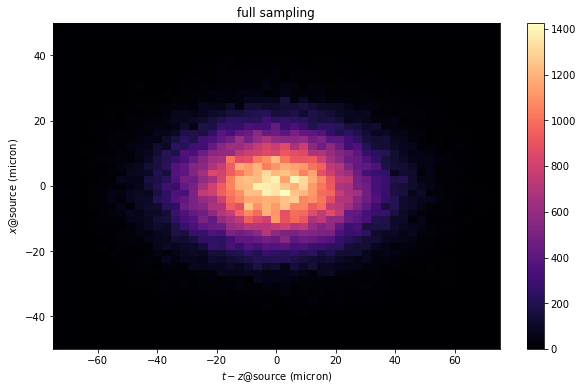

In [11]:
figure(figsize=(10,6))
bbins=(linspace(-75,75,50),linspace(-2*w0,2*w0,50))

subplot(111)

'''
 Phase vs X Co-ordinate   

'''
hist2d(X0-X3,X1,bins=bbins,weights=W ,rasterized=True,cmap=cm.magma);
colorbar()

xlabel(r'$t-z@$source (micron)')
ylabel(r'$x@$source (micron)')
title(f'{sampling} sampling')

'''

This plot basicall gives us the phase of the different photons at the source. After getting doppler shifted twice 
the incoming beam is shrinked and becomes a short pulse in Lab frame. But since different photons are generated 
with different phase as observed in the plot the pulse becomes longer.
'''


savefig(f'photon_source_length_{input_filename}_{mode}.pdf')


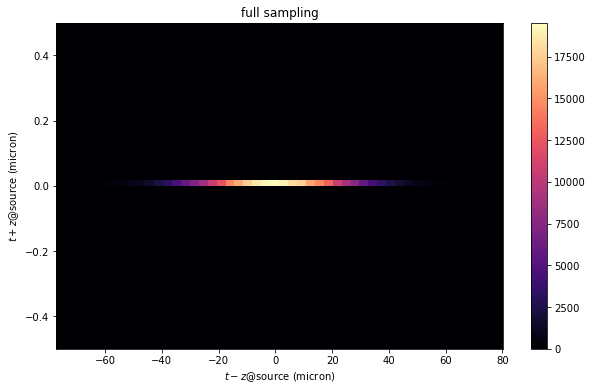

In [12]:
figure(figsize=(10,6))
bbins=(50,50)

subplot(111)
hist2d(X0-X3,X0+X3,bins=bbins,weights=W ,rasterized=True,cmap=cm.magma);
colorbar()

xlabel(r'$t-z@$source (micron)')
ylabel(r'$t+z@$source (micron)')
title(f'{sampling} sampling')



savefig(f'photon_source_lightfront_{input_filename}_{mode}.pdf')


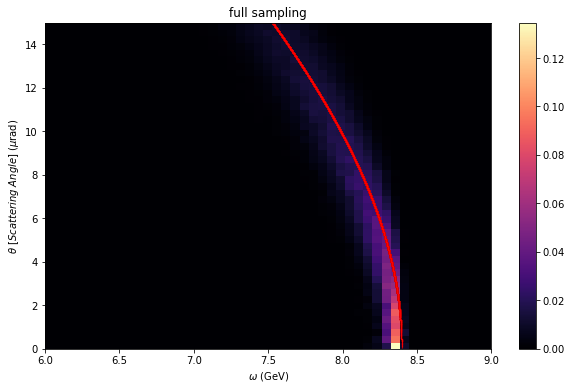

<Figure size 432x288 with 0 Axes>

In [17]:
figure(figsize=(10,6))

bbins=(linspace(6,9,50),linspace(0,15,50))

subplot(111)
hist2d(K0/1e9,sqrt(K1**2+K2**2)/K3*1e6,bins=bbins,weights=W/sqrt(K1**2+K2**2),rasterized=True,cmap=cm.magma);
colorbar()
xlabel(r'$\omega$ (GeV)')
ylabel(r'$\theta$ $  [Scattering$ $Angle]$ ($\mu$rad)');
title(rf'{sampling} sampling')
'''
Theoretical Plot

beta=(1-gamma**(-2))**0.5
w(theta)= (w*((1+beta)*gamma)**2)/(((gamma**2)*(1-beta*cos(theta)))+(Xr*(1+cos(theta))))/(1+beta)


'''

beta=(1-gamma**(-2))**0.5
theta=sqrt(K1**2+K2**2)/K3

N=( omega0 *((1+beta)* gamma)**2)
A=((gamma**2)*(1-beta*np.cos(theta)))
B=(0.25*Xr*(1+np.cos(theta)))
Omega = N/(A+B)/(1+beta)


scatter( Omega/1e9 , theta*1e6,c='r',s=0.02 )
show()


savefig(f'photon_angular_spectrum_{input_filename}_{mode}.pdf')


In [ ]:
fig,ax=subplots(1,1,figsize=(10,6))
bbins=(50,50)

p0=ax.hist(P3/1e9,bins=70,weights=W);
p0=ax.hist(P0/1e9,bins=70,weights=W,alpha=0.5);

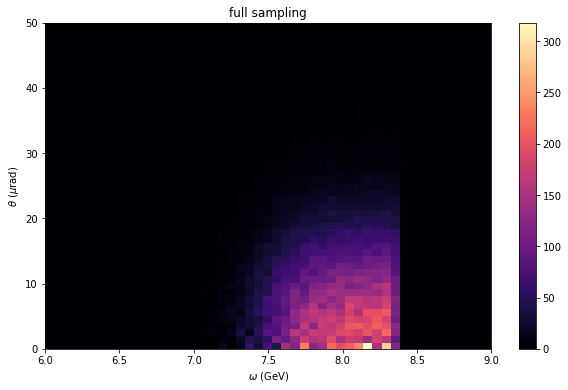

In [55]:
figure(figsize=(10,6))

bbins=(linspace(6,9,50),linspace(0,50,50))

subplot(111)
hist2d(K0/1e9,sqrt(X1**2+X2**2),bins=bbins,weights=W/sqrt(X1**2+X2**2),rasterized=True,cmap=cm.magma);
colorbar()
xlabel(r'$\omega$ (GeV)')
ylabel(r'$\theta$ ($\mu$rad)');
title(rf'{sampling} sampling')


savefig(f'photon_transverse_spectrum_{input_filename}_{mode}.pdf')


In [26]:
thetax=K1/K3
thetay=K2/K3

baseline = 7.5e6 

xoffset = thetax * baseline
yoffset = thetay * baseline

Goal: To get as many photons within the spot size
IP-laser spot size: 3.00 micron
baseline          : 7.50 metres
------------------------------------------
photons in spot, full sampling:
macrophoton weight               : 5.538
macrophotons, zero   source size : 68
macrophotons, finite source size : 59
photon weight, zero   source size: 356.7175104074895
photon weight, finite source size: 308.13569514622117


"\nprint ( 'Ratio of Photons inside the spot size, finite source size:', sum( selector2 )/len(X2))\nprint ( 'Ratio of Photons inside the spot size, Zero source size:  ', sum( selector1 )/len(X2))"

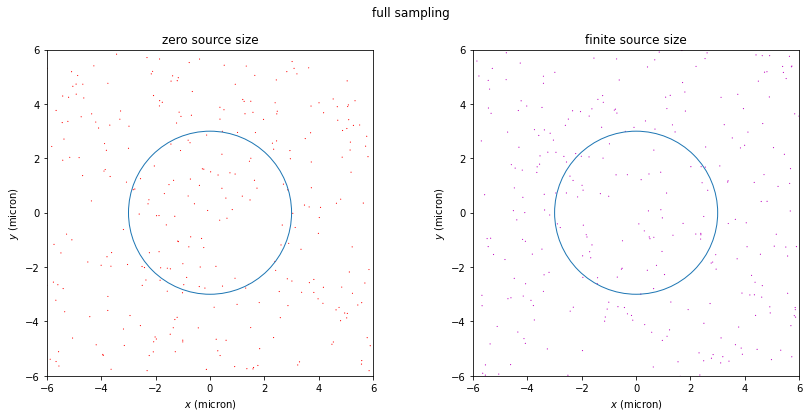

In [27]:
spotsize = 3 # micron

'''
The two plots shown here labelled as 
1. Zero source size  
2. Finite source size have the following interpretation

1. Zero source size

Zero Source size assumes that all the photons are produced at (t,0,0,0) 
   
   
2. Finite source size
Finite Source size assumes that the photons are produced at (t,x,y,z).


'''
figure(figsize=(14,6))

ax1=subplot(121,aspect=1)
scatter(xoffset, yoffset, color='r',marker='.',lw=0,s=W);
xlim(-2*spotsize,2*spotsize)
ylim(-2*spotsize,2*spotsize)

xlabel(r'$x$ (micron)')
ylabel(r'$y$ (micron)');
title('zero source size')


ax2=subplot(122,aspect=1)

# plot(X1+xoffset, X2+yoffset, color='m', marker=',',lw=0);

"""
The Following line adds the spatia; co-ordinates to the previuosly calculated offset"""




scatter(X1+xoffset, X2+yoffset, color='m', marker='.',lw=0,s=W);

xlim(-2*spotsize,2*spotsize)
ylim(-2*spotsize,2*spotsize)

xlabel(r'$x$ (micron)')
ylabel(r'$y$ (micron)');
title('finite source size')

ax1.add_patch(Circle((0,0),spotsize,color='C0',fill=False))
ax2.add_patch(Circle((0,0),spotsize,color='C0',fill=False))


suptitle(f'{sampling} sampling')

savefig(f'photons_at_focus_{input_filename}_{mode}.png',dpi=200)

print(r'Goal: To get as many photons within the spot size')




selector1 = sqrt(xoffset**2+yoffset**2) < spotsize
selector2 = sqrt((xoffset+X1)**2+(yoffset+X2)**2) < spotsize


print ( f'IP-laser spot size: {spotsize:.2f} micron')
print ( f'baseline          : {baseline/1e6:.2f} metres')
print ('-'*42)

print (f'photons in spot, {sampling} sampling:')
print (f'macrophoton weight               : {amax(W):.4g}')
print ( 'macrophotons, zero   source size :',sum( selector1 ) )
print ( 'macrophotons, finite source size :',sum( selector2 ) )
print ( 'photon weight, zero   source size:',sum(W[selector1 ] ) )
print ( 'photon weight, finite source size:',sum(W[selector2 ] ) )
"""
print ( 'Ratio of Photons inside the spot size, finite source size:', sum( selector2 )/len(X2))
print ( 'Ratio of Photons inside the spot size, Zero source size:  ', sum( selector1 )/len(X2))"""

In [38]:
len(selector2)

59575

### Photon Spectrum at IP

In [1]:
figure(figsize=(10,6))

subplot(111)
hist(K0[selector1]/1e9,bins=linspace(6,9,50),weights=W[selector1],alpha=1  ,fc='C0',label='no source size');
hist(K0[selector2]/1e9,bins=linspace(6,9,50),weights=W[selector2],alpha=0.5,fc='C3',label='finite source size'); 
xlim(6,9)
legend()
xlabel('ICS photon energy (GeV)')
ylabel('photon spectrum at IP')
title(rf'{sampling} sampling')

savefig(f'photon_spectrum_at_focus_{input_filename}_{mode}.pdf')


NameError: name 'figure' is not defined

### Photon Weight Distribution at IP

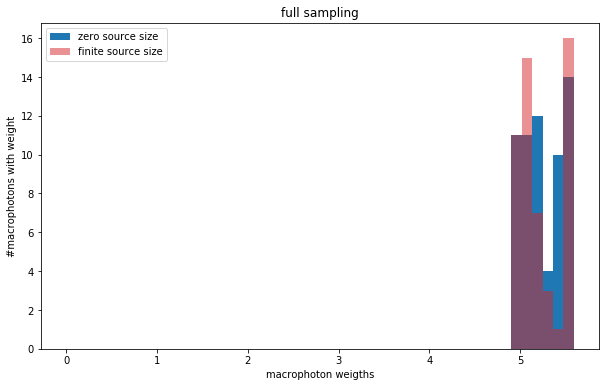

In [17]:
figure(figsize=(10,6))
base_weight = amax(W)
bbins = linspace(0,base_weight,50) 

hist( W[selector1],bins=bbins,label='zero source size'  ,fc='C0');
hist( W[selector2],bins=bbins,label='finite source size',fc='C3',alpha=0.5);


xlabel('macrophoton weigths')
ylabel('#macrophotons with weight')
title(rf'{sampling} sampling')
legend()
savefig(f'photon_weights_{input_filename}_{mode}.pdf')


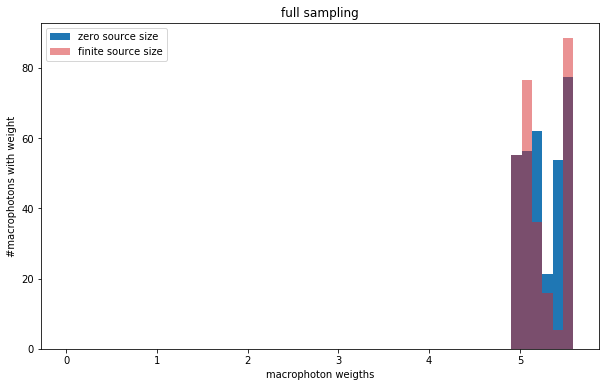

In [18]:
figure(figsize=(10,6))
base_weight = amax(W)
bbins = linspace(0,base_weight,50) 

hist( W[selector1],bins=bbins,weights=W[selector1],label='zero source size'  ,fc='C0',alpha=1.0);
hist( W[selector2],bins=bbins,weights=W[selector2],label='finite source size',fc='C3',alpha=0.5);

xlabel('macrophoton weigths')
ylabel('#macrophotons with weight')
title(rf'{sampling} sampling')
legend()
savefig(f'photon_weights2_{input_filename}_{mode}.pdf')


### Electrons

 Initial Energy of electrons : 16.5 GeV ± 1.0 MeV


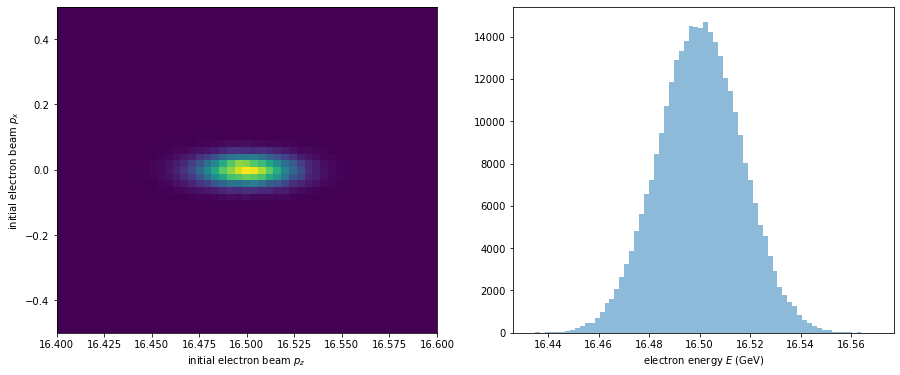

In [81]:
theta_ex = P1/P3
theta_ey = P2/P3
theta_e  = sqrt(theta_ex**2+theta_ey**2)

bbins=(linspace(16.4,16.6,50),linspace(-0.5,0.5,50))

fig,ax=subplots(1,2,figsize=(15,6))

ax[0].hist2d( (P3+K3)/1e9 , (P1+K1)/1e6 , bins=bbins );
ax[0].set_xlabel(r'initial electron beam $p_z$')
ax[0].set_ylabel(r'initial electron beam $p_x$')


bbins=(50,50)


p0=ax[1].hist((P0+K0)/1e9,bins=70,weights=W,alpha=0.5);# P0 

xlabel(r'electron energy $E$ (GeV)')
print(f' Initial Energy of electrons : {(511*10**3)*gamma*10**-9} GeV \u00B1 {energyspread*10**3} MeV')  


Text(0, 0.5, 'electron $p_y$ (MeV)')

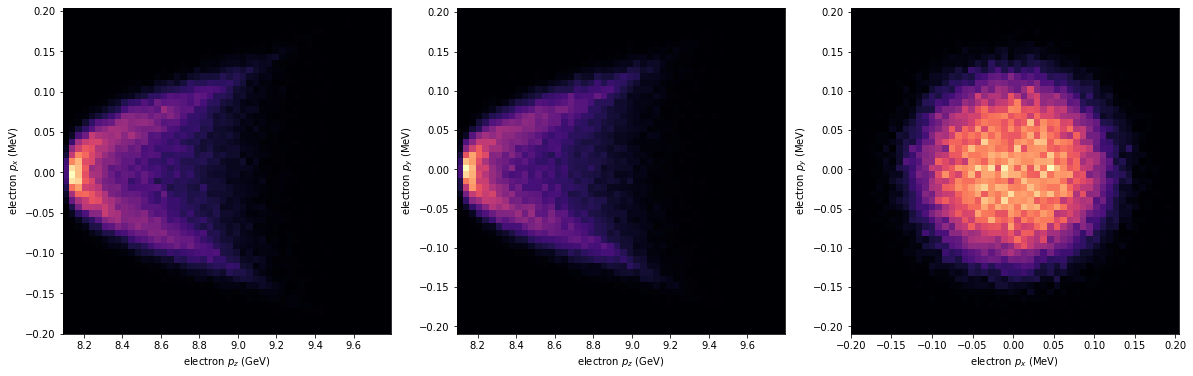

In [19]:
fig,ax=subplots(1,3,figsize=(20,6))
bbins=(50,50)

p0=ax[0].hist2d(P3/1e9,P1/1e6,bins=bbins,weights=W,rasterized=True,cmap=cm.magma);
# colorbar(p0,ax=ax[0])

p1=ax[1].hist2d(P3/1e9,P2/1e6,bins=bbins,weights=W,rasterized=True,cmap=cm.magma);
# colorbar(p1,ax=ax[1])

p2=ax[2].hist2d(P1/1e6,P2/1e6,bins=bbins,weights=W,rasterized=True,cmap=cm.magma);
# colorbar(p2,ax=ax[2])


ax[0].set_xlabel(r'electron $p_z$ (GeV)')
ax[1].set_xlabel(r'electron $p_z$ (GeV)')
ax[2].set_xlabel(r'electron $p_x$ (MeV)')

ax[0].set_ylabel(r'electron $p_x$ (MeV)')
ax[1].set_ylabel(r'electron $p_y$ (MeV)')
ax[2].set_ylabel(r'electron $p_y$ (MeV)')


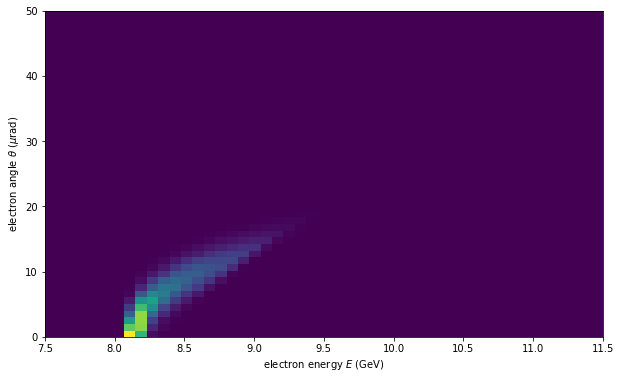

In [20]:
theta_ex = P1/P3
theta_ey = P2/P3
theta_e  = sqrt(theta_ex**2+theta_ey**2)

bbins=(linspace(7.5,11.5,50),linspace(0,50,50))

fig,ax=subplots(1,1,figsize=(10,6))

hist2d( P0/1e9 , theta_e*1e6 , bins=bbins , weights=W/theta_e );

xlabel(r'electron energy $E$ (GeV)')
ylabel(r'electron angle $\theta$ ($\mu$rad)');

Text(0.5, 0, 'electron energy $E$ (GeV)')

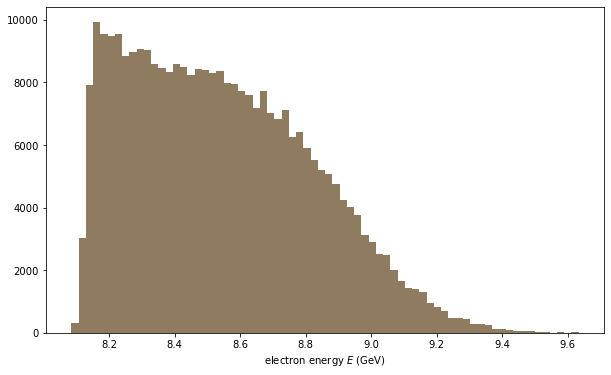

In [82]:
fig,ax=subplots(1,1,figsize=(10,6))
bbins=(50,50)

p0=ax.hist(P3/1e9,bins=70,weights=W);#Pz
p0=ax.hist(P0/1e9,bins=70,weights=W,alpha=0.5);# P0 
"""
And since both of the plots overlap, the spectrum has a small transverse profile 
"""
xlabel(r'electron energy $E$ (GeV)')
 


In [ ]:
print(p0)